In [8]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bvh_converter import bvh_mod
from scipy.signal import savgol_filter

from matplotlib.lines import Line2D
from scipy.interpolate import interp1d

from utils_trajectory.trajectory_by_subdiv import plot_foot_trajectories_by_subdiv
from utils_trajectory.trajectory_by_beat import plot_foot_trajectories_by_beat
from utils_trajectory.trajectory_cycle import plot_all_cycles_trajectories


### Trajectory Subplots by Subdivision (no cycle wrapping): Single Plot

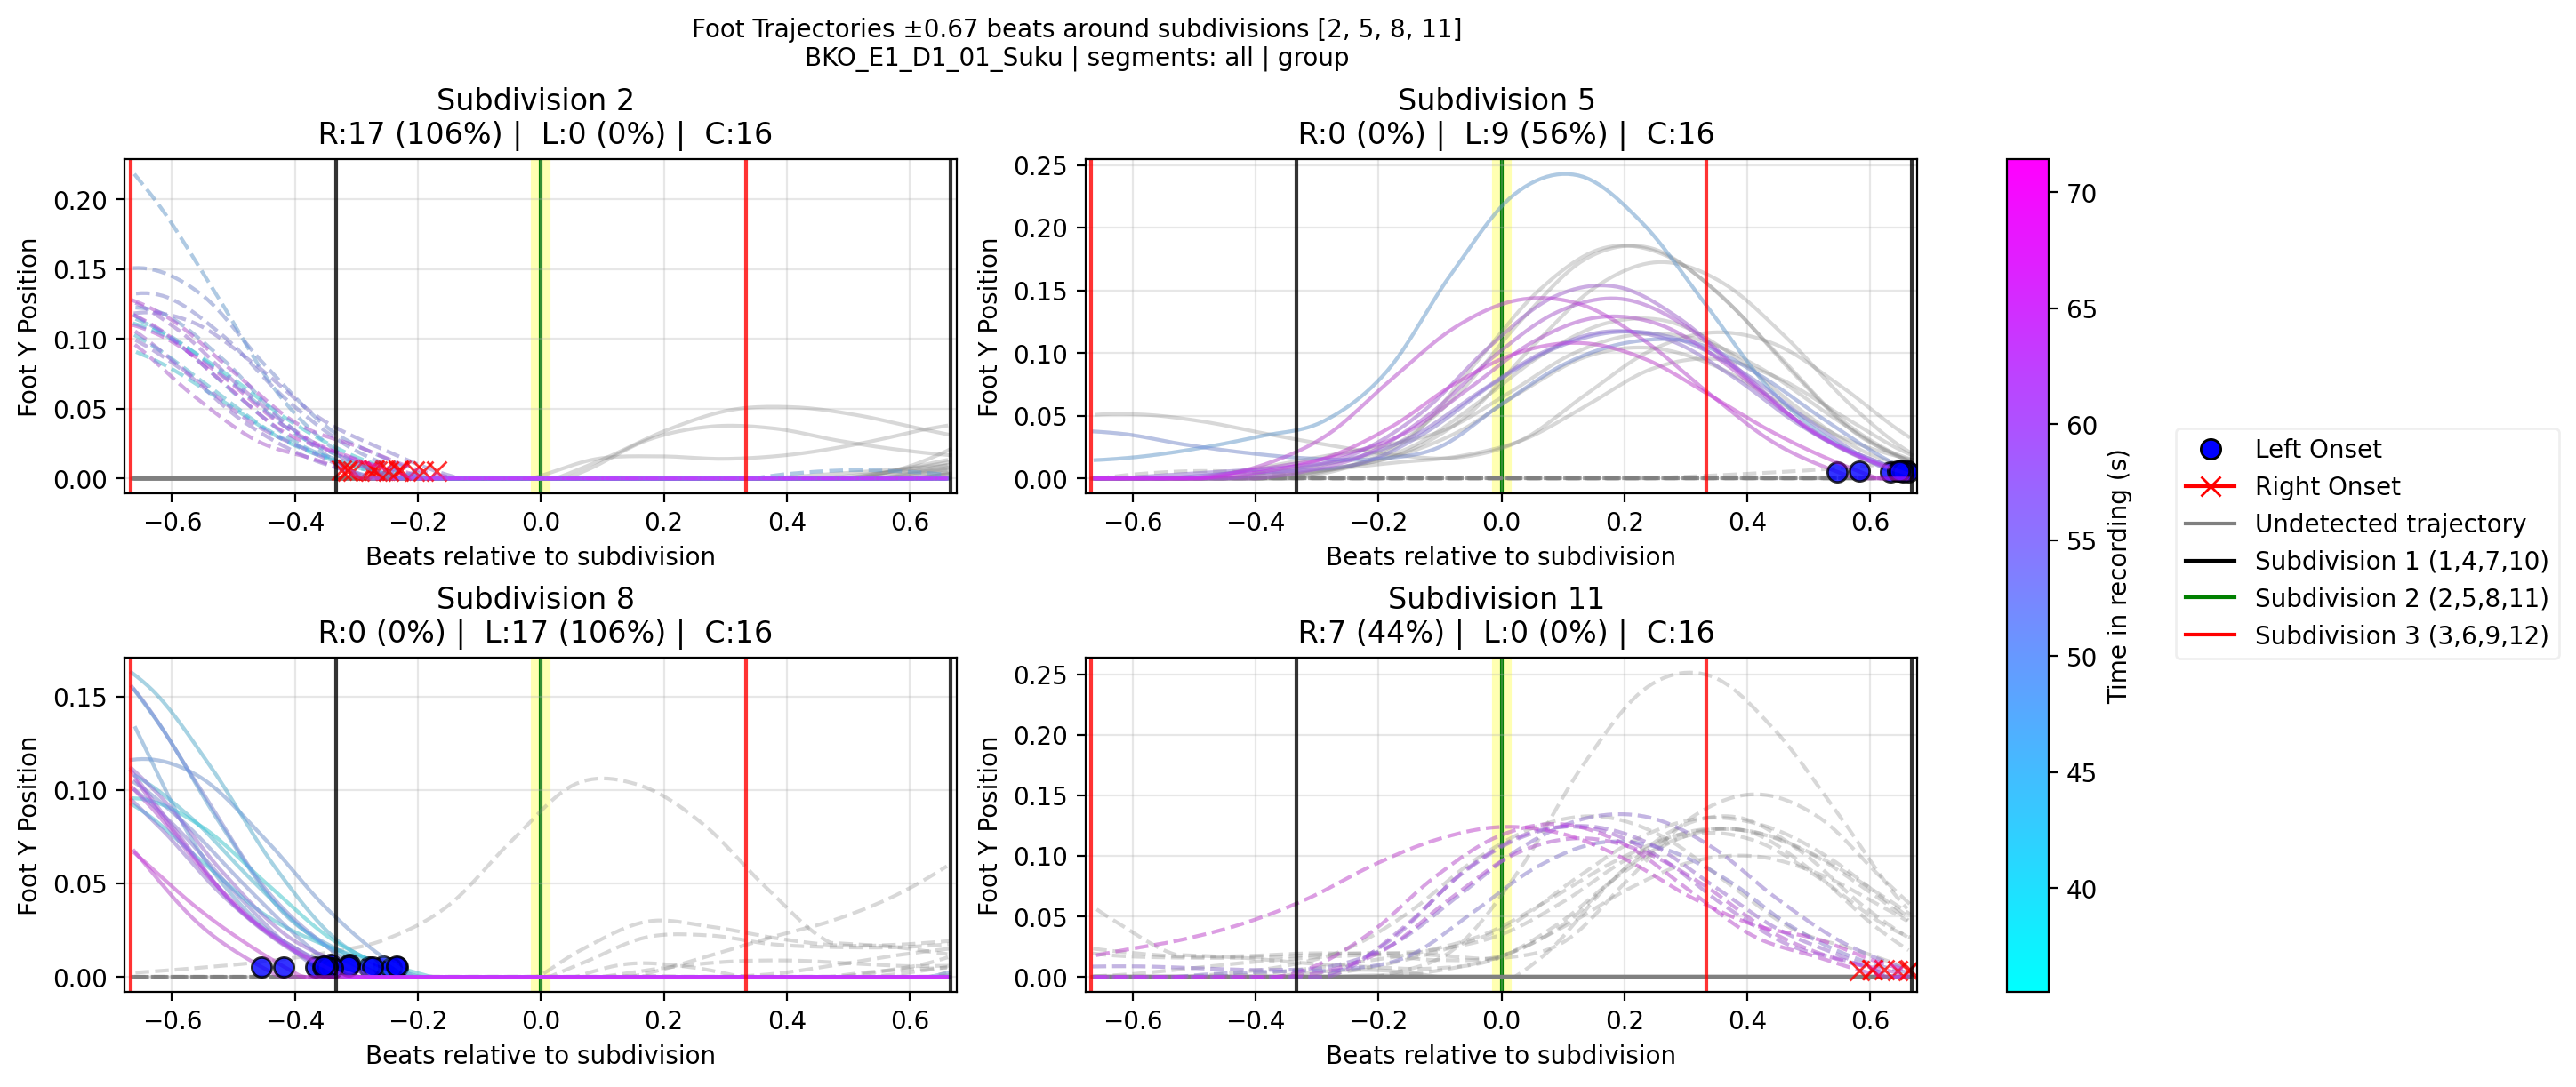

In [2]:
file_name = "BKO_E1_D1_01_Suku" #mode_csv.split("_Dancers")[0]
mode_df = pd.read_csv("data/subset_dance_annotation/" + file_name + "_Dancers.csv")

mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

# helper to extract all (start, end) tuples for a mode
def get_segments(df, name):
    if df.empty:
        # print(f"⚠️  No rows for mode '{name}', skipping.")
        return None
    return [(row["Start (in sec)"], row["End (in sec)"]) for _, row in df.iterrows()]

# build a dict of segments
segments = {
    "group":      get_segments(mode_group,      "gr"),
    "individual": get_segments(mode_individual, "in"),
    "audience":   get_segments(mode_audience,   "au")
}

def get_tsegment_for(mode_name, mode_value, suffix):
    """
    Run get_segments on one mode, and return a one-entry dict
    iff it isn’t None.
    """
    seg = get_segments(mode_value, suffix)
    return mode_name, seg if seg is not None else {}


mode_name, segmnt = get_tsegment_for("group", mode_group,      "gr")
# mode_name, segmnt = get_tsegment_for("individual", mode_individual, "in")
# mode_name, segmnt   = get_tsegment_for("audience",   mode_audience,   "au")
    
    # filter out the empty ones
    # tsegment = {mode: seg for mode, seg in segments.items() if seg is not None}

fig, ax = plot_foot_trajectories_by_subdiv(
    file_name=file_name,
    mode=mode_name,
    base_path_cycles="data/virtual_cycles",
    base_path_logs="data/logs_v1_may",
    time_segments=segmnt,  # Pass all segments for this mode
    n_beats_per_cycle=4, 
    n_subdiv_per_beat=3, 
    nn=2,       # number of subdiv you want around 0
    use_cycles=True,
    show_gray_plots=True,
    subdiv_set= [2,5,8,11],      #   [1,4,7,10]   [2,5,8,11] [3,6,9,12]
    show_trajectories= True,  # New parameter to control trajectory lines
    show_vlines= False        # New parameter to control vertical lines
)

plt.show(fig)

# fig.savefig(os.path.join(save_dir, f"{file_name}_{mode}.png"))
# plt.close(fig)

### Batch process

In [ ]:
mode_csv_list = os.listdir("data/subset_dance_annotation")

for mode_csv in mode_csv_list:
    file_name = mode_csv.split("_Dancers")[0]
    mode_df = pd.read_csv("data/subset_dance_annotation/" + mode_csv)

    mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
    mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
    mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

    # helper to extract all (start, end) tuples for a mode
    def get_segments(df, name):
        if df.empty:
            print(f"⚠️  No rows for mode '{name}', skipping.")
            return None
        return [(row["Start (in sec)"], row["End (in sec)"]) for _, row in df.iterrows()]

    # build a dict of segments
    segments = {
        "group":      get_segments(mode_group,      "gr"),
        "individual": get_segments(mode_individual, "in"),
        "audience":   get_segments(mode_audience,   "au")
    }

    # filter out the empty ones
    tsegment = {mode: seg for mode, seg in segments.items() if seg is not None}

    save_dir = f"output_static_plot/foot_trajectories_subdiv/{file_name}"
    os.makedirs(save_dir, exist_ok=True)
    for mode, segments in tsegment.items():
        fig, ax = plot_foot_trajectories_by_subdiv(
            file_name=file_name,
            mode=mode,
            base_path_cycles="data/virtual_cycles",
            base_path_logs="data/logs_v2_may",
            time_segments=segments,  # Pass all segments for this mode
            n_beats_per_cycle=4, 
            n_subdiv_per_beat=3, 
            nn=2,           # number of subdiv you want around 0
            use_cycles=True,
            show_gray_plots=True,
            subdiv_set=[2,5,8,11],
            show_trajectories=True,  # New parameter to control trajectory lines
            show_vlines=False        # New parameter to control vertical lines
        )
        # Create a filename that includes all segments
        # segment_str = "_".join([f"{start:.1f}_{end:.1f}" for start, end in segments])
        # fig.legend()
        fig.savefig(os.path.join(save_dir, f"{file_name}_{mode}.png"), bbox_inches="tight")
        plt.close(fig)

### Trajectory Subplots by Beat (with cycle wrapping): single plot

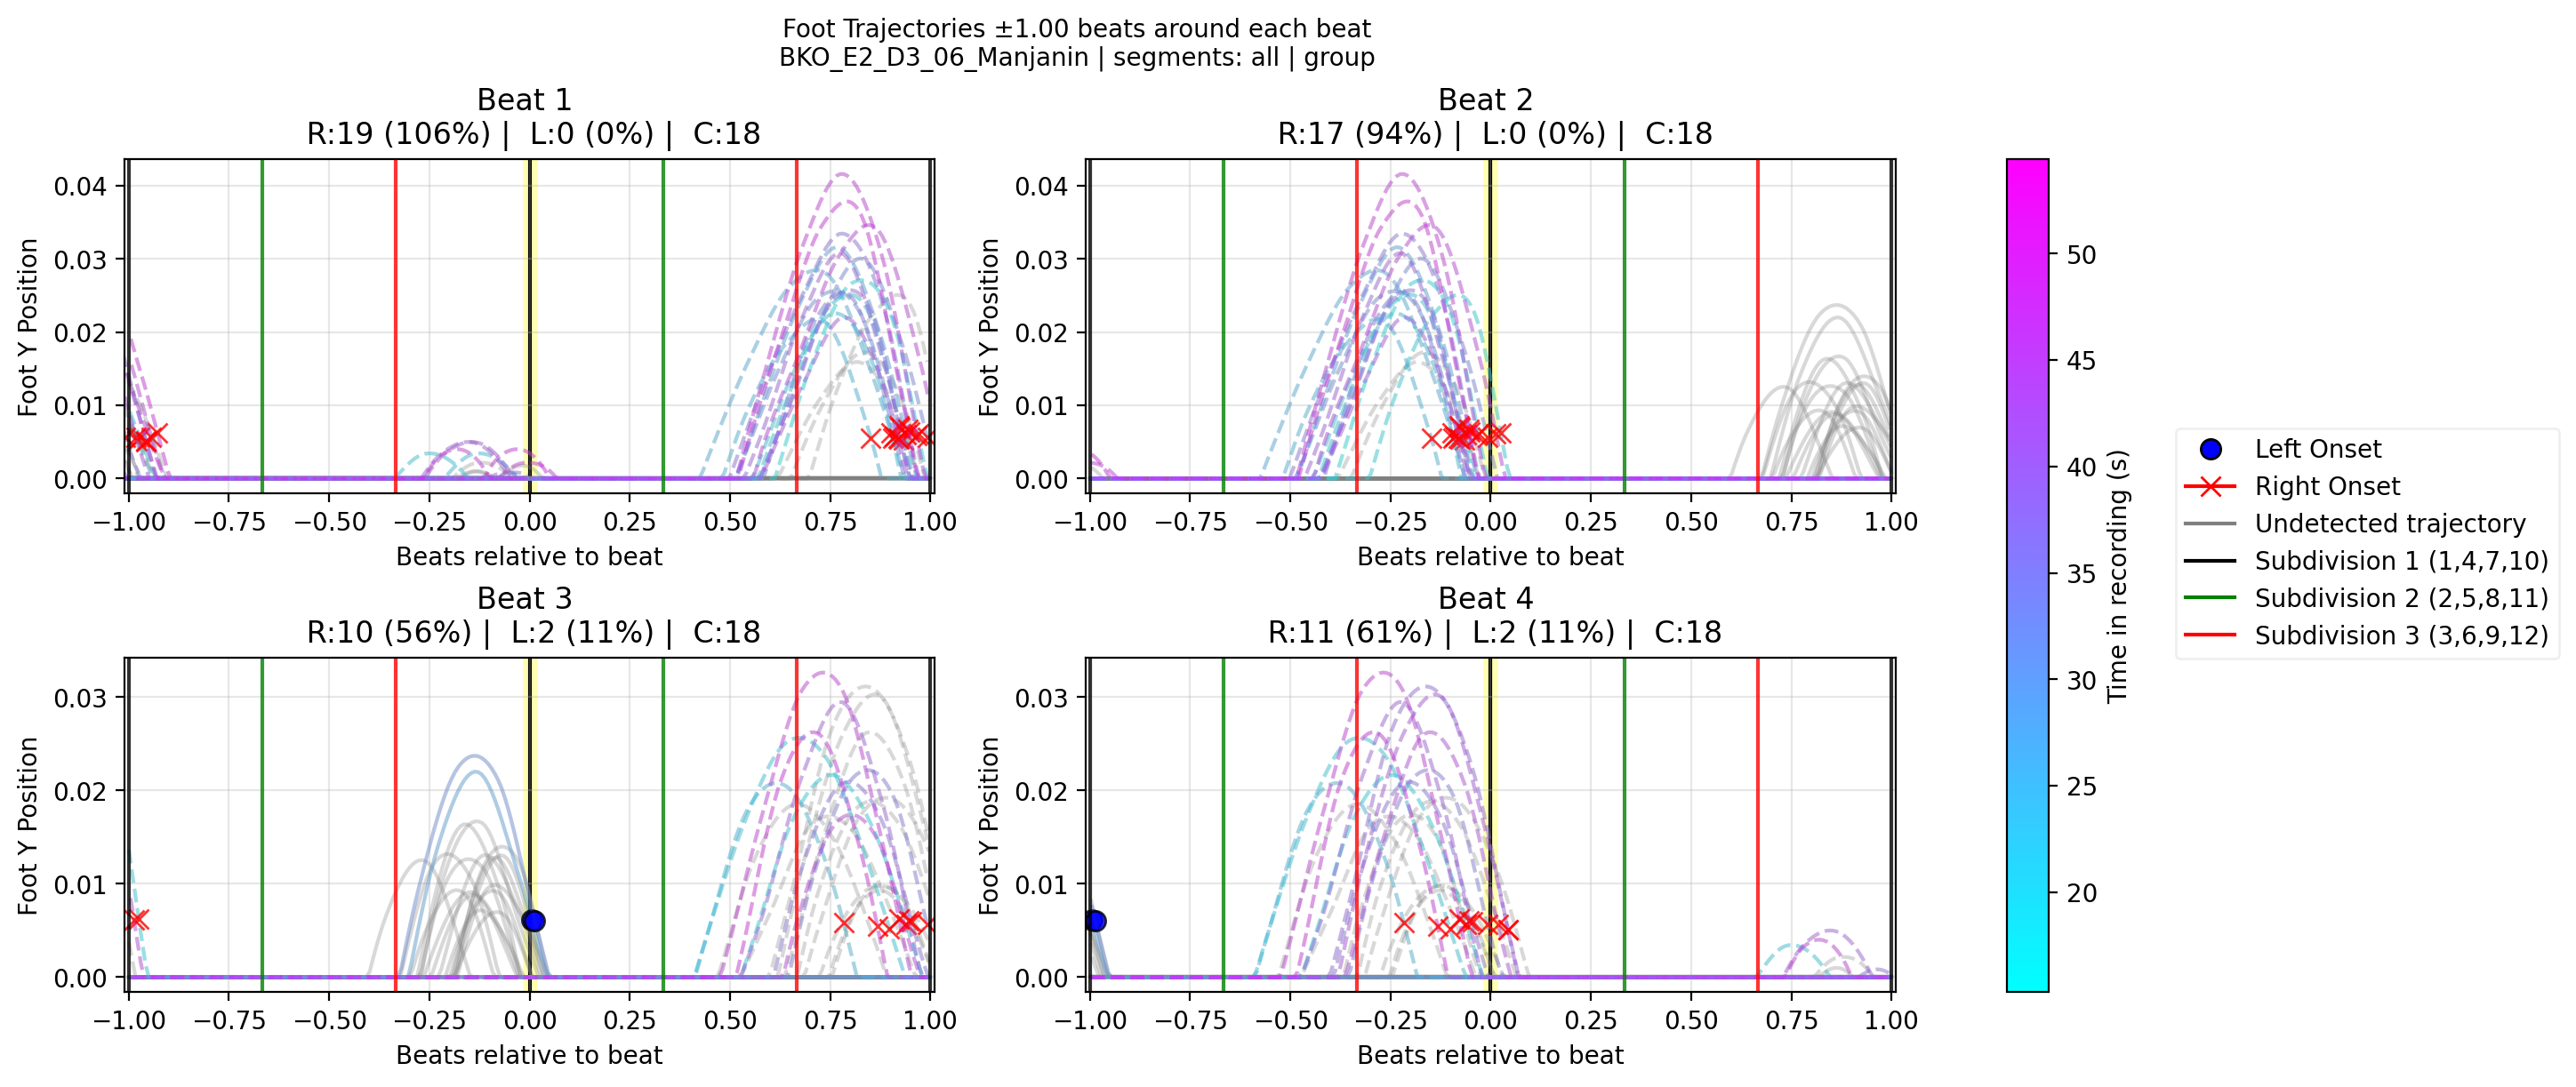

In [ ]:
file_name =  "BKO_E2_D3_06_Manjanin"           # "BKO_E1_D1_01_Suku" #mode_csv.split("_Dancers")[0]
mode_df = pd.read_csv("data/subset_dance_annotation/"  + file_name + "_Dancers.csv")

mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

# helper to extract all (start, end) tuples for a mode
def get_segments(df, name):
    if df.empty:
        # print(f"⚠️  No rows for mode '{name}', skipping.")
        return None
    return [(row["Start (in sec)"], row["End (in sec)"]) for _, row in df.iterrows()]

# build a dict of segments
segments = {
    "group":      get_segments(mode_group,      "gr"),
    "individual": get_segments(mode_individual, "in"),
    "audience":   get_segments(mode_audience,   "au")
}

def get_tsegment_for(mode_name, mode_value, suffix):
    """
    Run get_segments on one mode, and return a one-entry dict
    iff it isn’t None.
    """
    seg = get_segments(mode_value, suffix)
    return mode_name, seg if seg is not None else {}


mode_name, segmnt = get_tsegment_for("group", mode_group,      "gr")
# mode_name, segmnt = get_tsegment_for("individual", mode_individual, "in")
# mode_name, segmnt   = get_tsegment_for("audience",   mode_audience,   "au")
    
    # filter out the empty ones
    # tsegment = {mode: seg for mode, seg in segments.items() if seg is not None}


# save_dir = f"output_static_plot/foot_trajectories_beat/{file_name}"
# os.makedirs(save_dir, exist_ok=True)

fig, ax = plot_foot_trajectories_by_beat(
            file_name=file_name,
            mode=mode_name,
            base_path_cycles="data/virtual_cycles",
            base_path_logs= "data/logs_v1_may" #        "data/logs_v3_0.2__lower_jun3",                 #"data/logs_v1_may",
            time_segments=segmnt,  # Pass all segments for this mode
            n_beats_per_cycle=4, 
            n_subdiv_per_beat=3, 
            nn=3,
            use_cycles=True,
            show_gray_plots=True,
            show_trajectories=True,  # New parameter to control trajectory lines
            show_vlines=False        # New parameter to control vertical lines
        )

plt.show(fig)


# fig.savefig(os.path.join(save_dir, f"{file_name}_{mode}.png"))
# plt.close(fig)

### batch process

In [11]:
mode_csv_list = os.listdir("data/subset_dance_annotation")

for mode_csv in mode_csv_list:
    file_name = mode_csv.split("_Dancers")[0]
    mode_df = pd.read_csv("data/subset_dance_annotation/" + mode_csv)

    mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
    mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
    mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

    # helper to extract all (start, end) tuples for a mode
    def get_segments(df, name):
        if df.empty:
            print(f"⚠️  No rows for mode '{name}', skipping.")
            return None
        return [(row["Start (in sec)"], row["End (in sec)"]) for _, row in df.iterrows()]

    # build a dict of segments
    segments = {
        "group":      get_segments(mode_group,      "gr"),
        "individual": get_segments(mode_individual, "in"),
        "audience":   get_segments(mode_audience,   "au")
    }

    # filter out the empty ones
    tsegment = {mode: seg for mode, seg in segments.items() if seg is not None}

    save_dir = f"output_static_plot/foot_trajectories_bybeat_0.007/{file_name}"
    os.makedirs(save_dir, exist_ok=True)
    for mode, segments in tsegment.items():
        fig, ax = plot_foot_trajectories_by_beat(
            file_name=file_name,
            mode=mode,
            base_path_cycles="data/virtual_cycles",
            base_path_logs= "data/logs_v4_0.007_foot_jun3",          # "data/logs_v2_may",   # "data/logs_v3_0.2__lower_jun3",    # "data/logs_v4_0.007_foot_jun3", 
            time_segments=segments,  # Pass all segments for this mode
            n_beats_per_cycle=4, 
            n_subdiv_per_beat=3, 
            nn=2,
            use_cycles=True,
            show_gray_plots=True,
            show_trajectories=True,  # New parameter to control trajectory lines
            show_vlines=False        # New parameter to control vertical lines
        )
        # plt.show(fig)
        fig.savefig(os.path.join(save_dir, f"{file_name}_{mode}.png"), bbox_inches="tight")
        plt.close(fig)

⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.


### Trajectory plot by cycle with average (without thresholding)

#### Single Plot

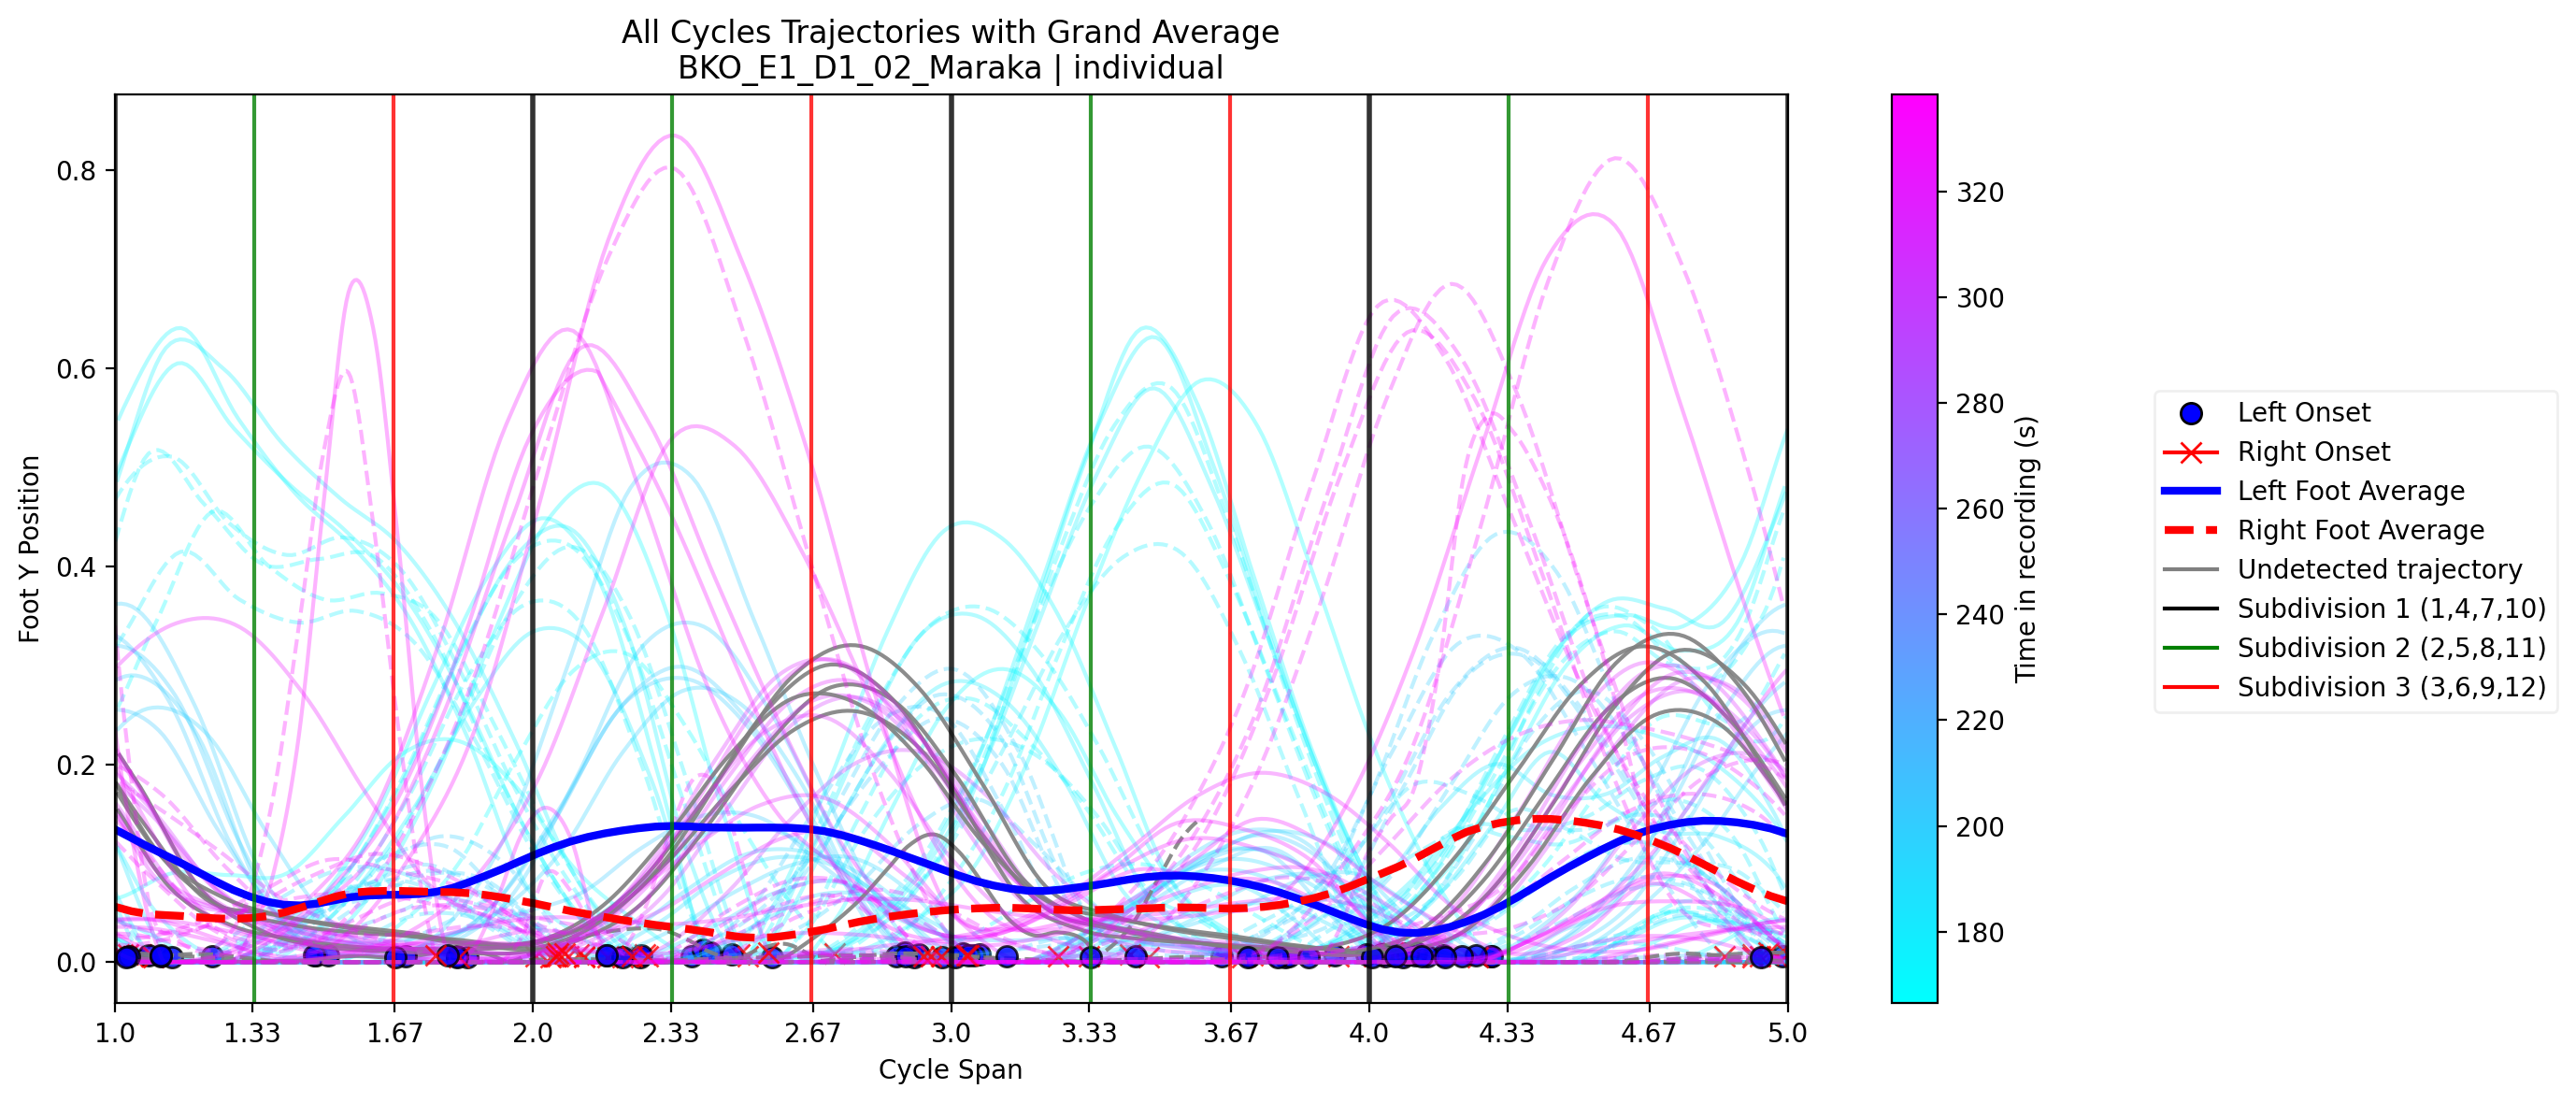

In [7]:
# mode_csv_list = os.listdir("data/subset_dance_annotation")

# for mode_csv in mode_csv_list:
file_name = "BKO_E1_D1_02_Maraka" #mode_csv.split("_Dancers")[0]
mode_df = pd.read_csv("data/subset_dance_annotation/" + file_name + "_Dancers.csv")

mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

# helper to extract all (start, end) tuples for a mode
def get_segments(df, name):
    if df.empty:
        # print(f"⚠️  No rows for mode '{name}', skipping.")
        return None
    return [(row["Start (in sec)"], row["End (in sec)"]) for _, row in df.iterrows()]

# build a dict of segments
segments = {
    "group":      get_segments(mode_group,      "gr"),
    "individual": get_segments(mode_individual, "in"),
    "audience":   get_segments(mode_audience,   "au")
}

def get_tsegment_for(mode_name, mode_value, suffix):
    """
    Run get_segments on one mode, and return a one-entry dict
    iff it isn’t None.
    """
    seg = get_segments(mode_value, suffix)
    return mode_name, seg if seg is not None else {}


# mode_name, segmnt = get_tsegment_for("group", mode_group,      "gr")
mode_name, segmnt = get_tsegment_for("individual", mode_individual, "in")
# mode_name, segmnt   = get_tsegment_for("audience",   mode_audience,   "au")
    
    # filter out the empty ones
    # tsegment = {mode: seg for mode, seg in segments.items() if seg is not None}

save_dir = f"output_static_plot/all_cycles_trajectories/{file_name}"
os.makedirs(save_dir, exist_ok=True)

fig, ax = plot_all_cycles_trajectories(
            file_name=file_name,
            mode=mode_name,
            base_path_cycles="data/virtual_cycles",
            base_path_logs="data/logs_v2_may",           # "data/logs_v2_may",   # "data/logs_v3_0.2_lower_jun3",    # "data/logs_v4_0.007_foot_jun3", 
            time_segments=segmnt,  # Pass all segments for this mode
            n_beats_per_cycle=4, 
            n_subdiv_per_beat=3, 
            # traj_threshold=0.4,     # exclude trajectories below this threshold
            show_gray_plots= True,
            show_trajectories= True,  # New parameter to control trajectory lines
            # show_grand_average= True,
            show_vlines= False        # New parameter to control vertical lines
        )

plt.show(fig)

# fig.savefig(os.path.join(save_dir, f"{file_name}_{mode}.png"))
# plt.close(fig)

#### Batch process

In [12]:
mode_csv_list = os.listdir("data/subset_dance_annotation")

for mode_csv in mode_csv_list:
    file_name = mode_csv.split("_Dancers")[0]
    mode_df = pd.read_csv("data/subset_dance_annotation/" + mode_csv)

    mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
    mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
    mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

    # helper to extract all (start, end) tuples for a mode
    def get_segments(df, name):
        if df.empty:
            print(f"⚠️  No rows for mode '{name}', skipping.")
            return None
        return [(row["Start (in sec)"], row["End (in sec)"]) for _, row in df.iterrows()]

    # build a dict of segments
    segments = {
        "group":      get_segments(mode_group,      "gr"),
        "individual": get_segments(mode_individual, "in"),
        "audience":   get_segments(mode_audience,   "au")
    }

    # filter out the empty ones
    tsegment = {mode: seg for mode, seg in segments.items() if seg is not None}

    save_dir = f"output_static_plot/foot_trajectories_fullcycle_0.007/{file_name}"
    os.makedirs(save_dir, exist_ok=True)
    for mode, segments in tsegment.items():
        fig, ax = plot_all_cycles_trajectories(
                    file_name=file_name,
                    mode=mode,
                    base_path_cycles="data/virtual_cycles",
                    base_path_logs="data/logs_v4_0.007_foot_jun3",              # "data/logs_v2_may",   # "data/logs_v3_0.2__lower_jun3",    # "data/logs_v4_0.007_foot_jun3", 
                    time_segments=segments,  # Pass all segments for this mode
                    n_beats_per_cycle=4, 
                    n_subdiv_per_beat=3, 
                    # nn=3,
                    show_gray_plots= True,
                    show_trajectories= True,  # New parameter to control trajectory lines
                    # show_grand_average= True,
                    show_vlines= False        # New parameter to control vertical lines
                )

        # plt.show(fig)

        fig.savefig(os.path.join(save_dir, f"{file_name}_{mode}.png"), bbox_inches="tight")
        plt.close(fig)

⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.
⚠️  No rows for mode 'gr', skipping.
⚠️  No rows for mode 'au', skipping.


### Utils

### Move the plots into mode wise folder

In [11]:
import os
import shutil

# Define your source and destination base directories
input_base_dir  = "output_static_plot/foot_trajectories_fullcycle"
output_base_dir = "output_static_plot/categorized_fullcycle"  # change this to wherever you want the three dirs

# List of categories and their corresponding suffixes
categories = ["audience", "group", "individual"]

# Create the category directories under the output base
for cat in categories:
    os.makedirs(os.path.join(output_base_dir, cat), exist_ok=True)

# Walk through each trajectory folder in the input base
for trajec in os.listdir(input_base_dir):
    trajec_path = os.path.join(input_base_dir, trajec)
    if not os.path.isdir(trajec_path):
        continue

    # Copy files matching each category into its directory
    for fname in os.listdir(trajec_path):
        for cat in categories:
            if fname.endswith(f"_{cat}.png"):
                src = os.path.join(trajec_path, fname)
                dst = os.path.join(output_base_dir, cat, fname)
                shutil.copy2(src, dst)
                break


In [ ]:
## mode time segments to pickle

import pickle

mode_csv_list = os.listdir("data/subset_dance_annotation")
for mode_csv in mode_csv_list:
    file_name = mode_csv.split("_Dancers")[0]
    mode_df = pd.read_csv("data/subset_dance_annotation/" + mode_csv)

    mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
    mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
    mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

    # helper to extract all (start, end) tuples for a mode
    def get_segments(df, name):
        if df.empty:
            print(f"⚠️  No rows for mode '{name}', skipping.")
            return None
        return [(row["Start (in sec)"], row["End (in sec)"]) for _, row in df.iterrows()]

    # build a dict of segments
    segments = {
        "group":      get_segments(mode_group,      "gr"),
        "individual": get_segments(mode_individual, "in"),
        "audience":   get_segments(mode_audience,   "au")
    }

    # filter out the empty ones
    tsegment = {mode: seg for mode, seg in segments.items() if seg is not None}

    output_name = mode_csv.split(".csv")[0]
    output_path = f"data/subset_dance_annotation_pickles/{output_name}.pkl"
    with open(output_path, "wb") as f:
        pickle.dump(tsegment, f)
 